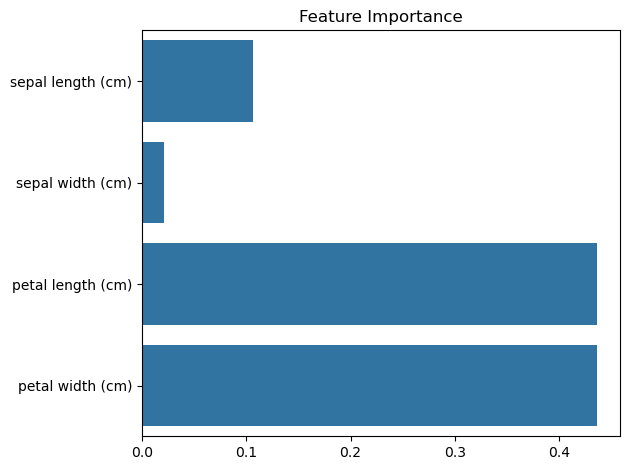

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Load dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target

# Feature importance
model = RandomForestClassifier(random_state=42)
model.fit(df[data.feature_names], df['species'])

importances = model.feature_importances_
sns.barplot(x=importances, y=data.feature_names)
plt.title("Feature Importance")
plt.tight_layout()
plt.savefig("../outputs/feature_importance.png")


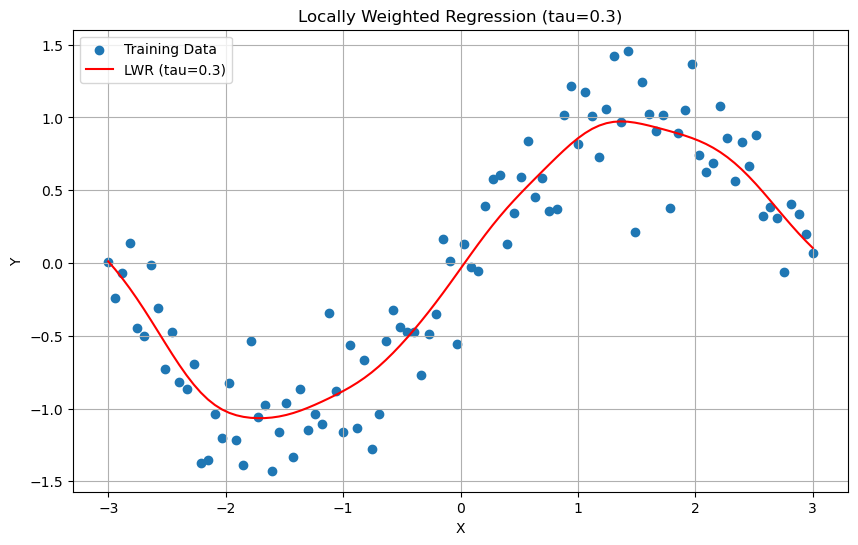

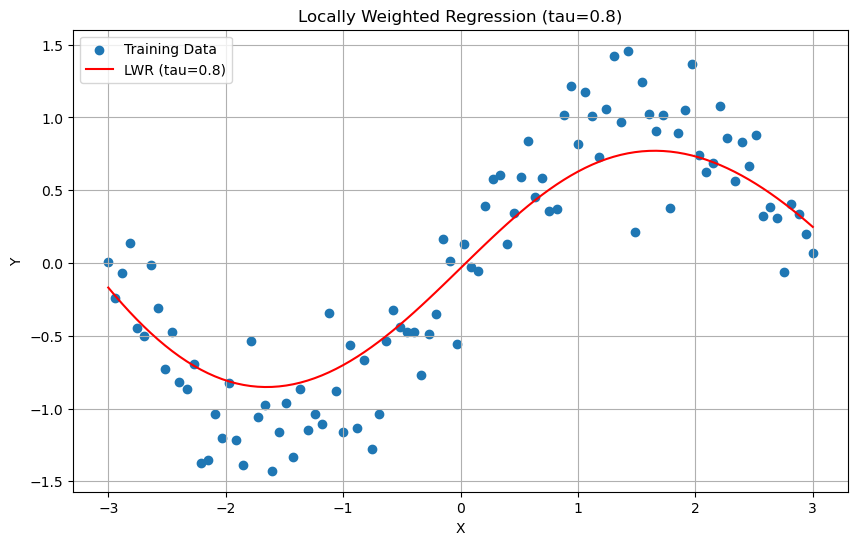

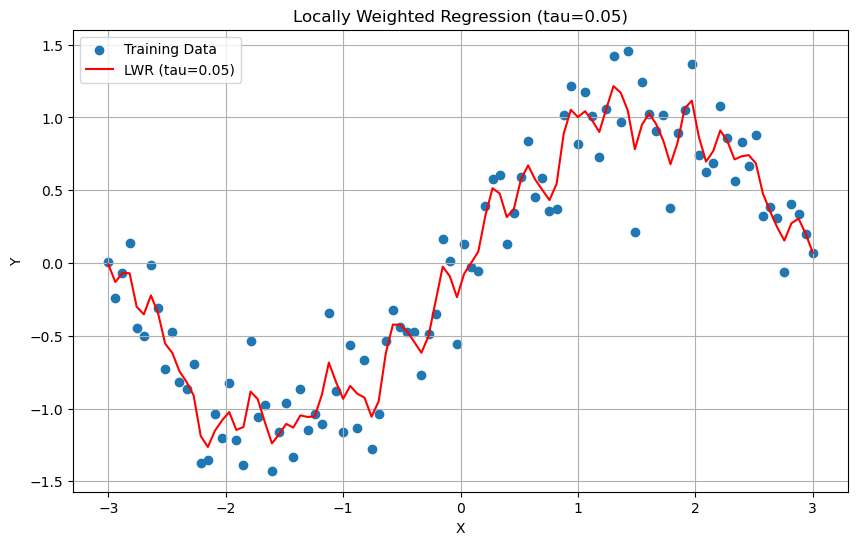

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def locally_weighted_regression(x, X, Y, tau):
    """
    Performs locally weighted regression.

    Args:
        x: The query point.
        X: The training data points (features).
        Y: The training data points (targets).
        tau: The bandwidth parameter.

    Returns:
        The predicted value at the query point.
    """
    # Fix: Calculate weights using broadcasting with the feature column (X[:, 1])
    weights = np.exp(-((x[1] - X[:, 1]) ** 2) / (2 * tau ** 2))  
    W = np.diag(weights)
    try:
        beta = np.linalg.pinv(X.T @ W @ X) @ X.T @ W @ Y
    except np.linalg.LinAlgError:
        print("Singular matrix encountered. Returning NaN")
        return np.nan

    return beta @ x

def generate_noisy_data(n=100):
    """Generates noisy sinusoidal data."""
    np.random.seed(42)  # For reproducibility
    X = np.linspace(-3, 3, n)
    Y = np.sin(X) + np.random.normal(0, 0.3, n)
    return X, Y

def plot_lwr(X, Y, tau):
    """Plots the locally weighted regression results."""
    x_test = np.linspace(min(X[:, 1]), max(X[:, 1]), 100) # Extract the second column (feature values)
    x_test = np.array([[1, x] for x in x_test])  # Add bias term
    y_pred = [locally_weighted_regression(x, X, Y, tau) for x in x_test]

    plt.figure(figsize=(10, 6))
    plt.scatter(X[:,1], Y, label="Training Data") # plotting the second column of X as features
    plt.plot(x_test[:,1], y_pred, color="red", label=f"LWR (tau={tau})") # plotting the second column of x_test as features
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Locally Weighted Regression (tau={tau})")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example Usage
X, Y = generate_noisy_data()
X = np.array([[1, x] for x in X]) #adding bias term to feature matrix

# Test with different tau values
plot_lwr(X, Y, tau=0.3)
plot_lwr(X, Y, tau=0.8)
plot_lwr(X,Y, tau=0.05)